##### Load the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

/Users/austincheang/opt/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


## Load the dataset

In [2]:
dataset = pd.read_csv('./data/regression_part2.csv')
dataset.sort_values(by=['input'], inplace = True)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X.shape)

dataset

(25, 1)


,input,output
11,-4.826,-15.577
16,-4.616,-15.291
2,-4.164,-10.016
22,-3.772,-6.342
6,-2.879,-5.204
23,-2.848,-1.673
18,-2.588,-0.988
7,-2.276,-1.465
21,-0.597,0.536
19,0.992,-1.133


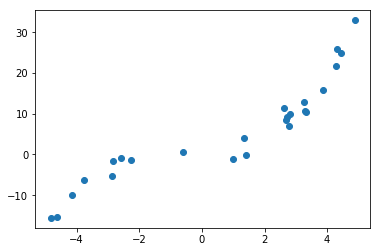

In [3]:
plt.scatter(X,y)

### Now doing M = 1

In [4]:
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

#### Visualising the Linear Regression results

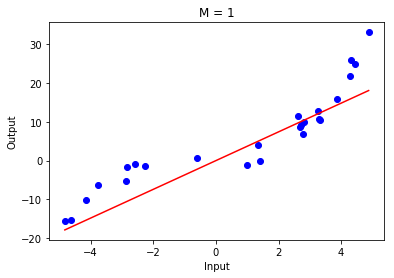

In [5]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin_reg.predict(X), color = 'red')
plt.title('M = 1')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

### Now doing M = 2

#### We train the polynomial regression model on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_with_m(x):
    poly = PolynomialFeatures(degree = x)
    X_poly = poly.fit_transform(X) 
#     print(X_poly)
#     print(y)
    poly.fit(X_poly, y) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, y) 
    plt.scatter(X, y, color = 'blue') 
  
    plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
    plt.title('m ='+ str(x)) 
    plt.xlabel('Input') 
    plt.ylabel('Output') 

    plt.show() 


#### Build the poly for different m

#### m = 1

In [7]:
regressor_1 = LinearRegression(fit_intercept=False)

regressor_1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

#### m = 2

In [8]:
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(X) 
print(X_poly_2)
poly_2.fit(X_poly_2, y) 
regressor_2 = LinearRegression(fit_intercept=False) 
regressor_2.fit(X_poly_2, y) 

[[ 1.       -4.826    23.290276]
 [ 1.       -4.616    21.307456]
 [ 1.       -4.164    17.338896]
 [ 1.       -3.772    14.227984]
 [ 1.       -2.879     8.288641]
 [ 1.       -2.848     8.111104]
 [ 1.       -2.588     6.697744]
 [ 1.       -2.276     5.180176]
 [ 1.       -0.597     0.356409]
 [ 1.        0.992     0.984064]
 [ 1.        1.345     1.809025]
 [ 1.        1.405     1.974025]
 [ 1.        2.633     6.932689]
 [ 1.        2.688     7.225344]
 [ 1.        2.728     7.441984]
 [ 1.        2.78      7.7284  ]
 [ 1.        2.815     7.924225]
 [ 1.        3.244    10.523536]
 [ 1.        3.276    10.732176]
 [ 1.        3.329    11.082241]
 [ 1.        3.874    15.007876]
 [ 1.        4.268    18.215824]
 [ 1.        4.31     18.5761  ]
 [ 1.        4.441    19.722481]
 [ 1.        4.875    23.765625]]


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

#### m = 3

In [9]:
poly_3 = PolynomialFeatures(degree = 3)
print(poly_3)
X_poly_3 = poly_3.fit_transform(X) 
print(X_poly_3.shape)
poly_3.fit(X_poly_3, y)
regressor_3 = LinearRegression(fit_intercept=False) 
regressor_3.fit(X_poly_3, y) 

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
(25, 4)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

#### m = 4

In [10]:
poly_4 = PolynomialFeatures(degree = 4)
X_poly_4 = poly_4.fit_transform(X) 
poly_4.fit(X_poly_4, y) 
regressor_4 = LinearRegression(fit_intercept=False) 
regressor_4.fit(X_poly_4, y) 

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

#### Now plot the graph with 4 lines

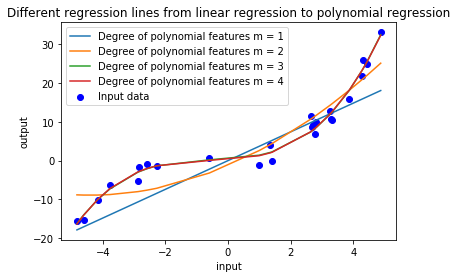

In [11]:
plt.scatter(X, y, color = 'blue', label = "Input data")
plt.plot(X, regressor_1.predict(X), label = 'Degree of polynomial features m = 1')
plt.plot(X, regressor_2.predict(X_poly_2), label = 'Degree of polynomial features m = 2')
plt.plot(X, regressor_3.predict(X_poly_3), label = 'Degree of polynomial features m = 3')
plt.plot(X, regressor_4.predict(X_poly_4), label = 'Degree of polynomial features m = 4')
plt.xlabel('input')
plt.ylabel('output')
plt.title('Different regression lines from linear regression to polynomial regression')
plt.legend()
plt.show()

### (b) (3 points) Create a bar plot where you display the Mean Squared Error of each of the four different polynomial regression models from the previous question.

#### Calculate the y_pred for different m

In [12]:
poly_1 = PolynomialFeatures(degree = 1)
X_poly_1 = poly_1.fit_transform(X) 
poly_1.fit(X_poly_1, y) 
regressor_1 = LinearRegression(fit_intercept=False) 
regressor_1.fit(X_poly_1, y)

y_pred_1 = regressor_1.predict(X_poly_1)
y_pred_2 = regressor_2.predict(X_poly_2)
y_pred_3 = regressor_3.predict(X_poly_3)
y_pred_4 = regressor_4.predict(X_poly_4)

# print(y_pred_3)
# print(y_pred_4)
# print(y)

#### Calculate the MSE for different m

In [13]:
from sklearn.metrics import mean_squared_error

print(X)
mse_1 = mean_squared_error(y, y_pred_1)
mse_2 = mean_squared_error(y, y_pred_2)
mse_3 = mean_squared_error(y, y_pred_3)
mse_4 = mean_squared_error(y, y_pred_4)
print(mse_1, mse_2, mse_3, mse_4)

mse_list = [mse_1, mse_2, mse_3, mse_4]

[[-4.826]
 [-4.616]
 [-4.164]
 [-3.772]
 [-2.879]
 [-2.848]
 [-2.588]
 [-2.276]
 [-0.597]
 [ 0.992]
 [ 1.345]
 [ 1.405]
 [ 2.633]
 [ 2.688]
 [ 2.728]
 [ 2.78 ]
 [ 2.815]
 [ 3.244]
 [ 3.276]
 [ 3.329]
 [ 3.874]
 [ 4.268]
 [ 4.31 ]
 [ 4.441]
 [ 4.875]]
24.744378032672856 17.352926937873296 2.7447567192524263 2.7389111790755374


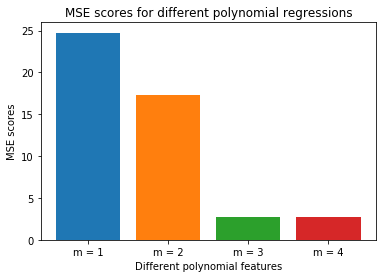

In [14]:
plt.bar(x = ['m = 1', 'm = 2', 'm = 3', 'm = 4'], height = mse_list, color =['#1f77b4', '#ff7f0e','#2ca02c','#d62728'])
plt.xlabel('Different polynomial features')
plt.ylabel('MSE scores')
plt.title('MSE scores for different polynomial regressions')
plt.show()

### (c) (4 points) Comment on the fit and Mean Squared Error values of the M = 3 andM = 4 polynomial regression models. Do they result in the same or different performance? Based on these results, which model would you choose?

In [15]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2001)

#### X_train_3

In [16]:
# poly_3 = PolynomialFeatures(degree = 3)
# X _poly_3 = poly_3.fit_transform(X_train) 
# print(X_poly_3)
# poly_3.fit(X_poly_3, y_train) 
# regressor_3 = LinearRegression(fit_intercept=False) 
# regressor_3.fit(X_poly_3, y_train) 

In [17]:
# train_poly_4 = PolynomialFeatures(degree = 4)
# train_X_poly_4 = train_poly_4.fit_transform(X_train) 
# print(train_X_poly_4)
# train_poly_4.fit(train_X_poly_4, y_train) 
# train_regressor_4 = LinearRegression(fit_intercept=False) 
# train_regressor_4.fit(train_X_poly_4, y_train) 

In [18]:
y_train.shape

(5, 1)

In [19]:
y.shape

(25,)

In [20]:
import sklearn.metrics as sm

def print_acc(m, y_pred):
    print(m)
    print("Mean absolute error =", round(sm.mean_absolute_error(y, y_pred), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y, y_pred), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y, y_pred), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y, y_pred), 2)) 
    print("R2 score =", round(sm.r2_score(y, y_pred), 2))

In [21]:
print_acc('m3', y_pred_3)
print_acc('m4', y_pred_4)

m3
Mean absolute error = 1.4
Mean squared error = 2.74
Median absolute error = 1.26
Explain variance score = 0.98
R2 score = 0.98
m4
Mean absolute error = 1.4
Mean squared error = 2.74
Median absolute error = 1.21
Explain variance score = 0.98
R2 score = 0.98


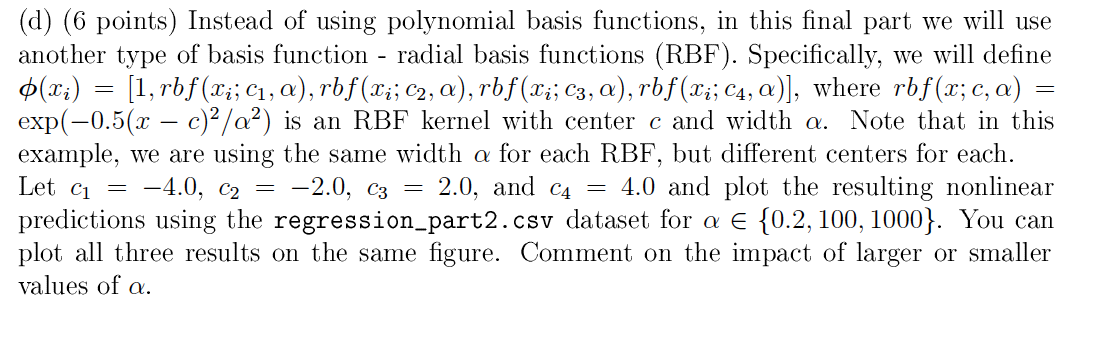

In [22]:
def rbf(x, c, a):
    return np.exp(-0.5*(x-c)**2/a**2)

In [23]:
c = np.array([-4.0, -2.0, 2.0, 4.0])
a = [0.2, 100, 1000]

# for a_ in a:
#     phi = np.ones((X.shape[0], 1))
#     print('alpha = ', a_)
#     for i in range(len(c)):
#         print('now with c = ', c[i])
#         rbf_ = rbf(X, c_, a_)
# #         print(phi.shape)
# #         print(rbf_.shape)
#         phi = np.concatenate((phi, rbf_), axis = 1)
# #         phi = np.insert(phi, 0, values = 1, axis = 1)
#     print(phi)
# #    

In [30]:
w_estimiate = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

In [34]:
#a1
rbf1 = rbf(X, c[0], a[0])
rbf2 = rbf(X, c[1], a[0])
rbf3 = rbf(X, c[2], a[0])
rbf4 = rbf(X, c[3], a[0])
phi1 = np.concatenate((rbf1, rbf2, rbf3, rbf4), axis = 1)
phi1 = np.insert(phi1, 0, values = 1, axis = 1)
reg1 = LinearRegression(fit_intercept=False)

reg1.fit(phi1, y)
print(reg1.coef_)
w_estimiate = np.dot(np.linalg.inv(np.dot(phi1.T, phi1)), np.dot(phi1.T, y))
# print(w_estimiate(phi1, y))
print(np.dot(phi1, w_estimiate))


[   6.0404573   -23.14561196  -20.06382496 -164.22343934   23.50509574]
[  6.03587999   5.83884219 -10.49662406  -6.04502853   6.0391715
   6.03795189   5.77409066  -1.70199475   6.0404573    6.03995663
   5.27062653   4.07462556   4.94341753   5.59807113   5.82252531
   5.95868154   5.9997602    6.05901226   6.07399819   6.12497488
  25.3146539   15.61796343  13.11121212   8.10767736   6.04209724]


In [35]:
#a2
rbf1 = rbf(X, c[0], a[1])
rbf2 = rbf(X, c[1], a[1])
rbf3 = rbf(X, c[2], a[1])
rbf4 = rbf(X, c[3], a[1])
phi2 = np.concatenate((rbf1, rbf2, rbf3, rbf4), axis = 1)
phi2 = np.insert(phi2, 0, values = 1, axis = 1)
reg2 = LinearRegression(fit_intercept=False)
reg2.fit(phi2, y)

print(reg2.coef_)
w_estimiate = np.dot(np.linalg.inv(np.dot(phi2.T, phi2)), np.dot(phi2.T, y))
# print(w_estimiate(phi1, y))
print(np.dot(phi2, w_estimiate))

[-1.34108420e+06 -1.14368727e+10  2.34223021e+10 -2.45441756e+10
  1.25607617e+10]
[-10.22493764 -10.28113492 -10.28330124 -10.15386017  -9.40369682
  -9.36629422  -9.02259592  -8.53941036  -4.61501863   1.15295356
   2.70499945   2.97857697   9.20102301   9.50749711   9.73188215
  10.02546435  10.22426532  12.73925618  12.93265232  13.25473456
  16.69469508  19.32674214  19.61449606  20.52089679  23.61984302]


In [36]:
#a3
rbf1 = rbf(X, c[0], a[2])
rbf2 = rbf(X, c[1], a[2])
rbf3 = rbf(X, c[2], a[2])
rbf4 = rbf(X, c[3], a[2])
phi3 = np.concatenate((rbf1, rbf2, rbf3, rbf4), axis = 1)
phi3 = np.insert(phi3, 0, values = 1, axis = 1)
reg3 = LinearRegression(fit_intercept=False)
reg3.fit(phi3, y)
print(reg3.coef_)
w_estimiate = np.dot(np.linalg.inv(np.dot(phi3.T, phi3)), np.dot(phi3.T, y))
# print(w_estimiate(phi1, y))
print(np.dot(phi3, w_estimiate))

[ 790143.96383348 -544521.0096244  -371039.97141702  -24047.65633613
  149459.4566681 ]
[-16.35917745 -16.41389769 -16.41345491 -16.28235487 -15.53032911
 -15.4929059  -15.14914118 -14.66611382 -10.74600359  -4.98440478
  -3.43361529  -3.16023504   3.05981724   3.36628061   3.5906643
   3.88425309   4.08306389   6.59855581   6.79201951   7.11422349
  10.55620622  13.19069523  13.47876325  14.38621412  17.48944746]


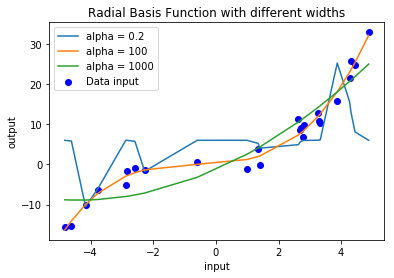

In [37]:
plt.scatter(X,y, color='blue', label = 'Data input')
plt.plot(X, reg1.predict(phi1), label = 'alpha = 0.2' )
plt.plot(X, reg2.predict(phi2), label = 'alpha = 100')
plt.plot(X, reg3.predict(phi3), label = 'alpha = 1000')
plt.xlabel('input')
plt.ylabel('output')
plt.title('Radial Basis Function with different widths')
plt.legend()
plt.show()